In [2]:
import os

if os.name == 'nt':
    %env DOC=C:\Users\BK\Documents
else:
    %env DOC=/Users/muuzh/Documents

from AMI import automutual_info_single, automutual_info, automutual_info_k1

env: DOC=C:\Users\BK\Documents
C:\Users\BK\Documents\JIDT\infodynamics.jar


In [99]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm, trange
from tqdm.contrib import tenumerate
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
import seaborn as sns
import pandas as pd
import time
import itertools
import scipy.stats as stats
import jpype
import datasets as datasets
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import measures as nolds
import scipy.io
from helper_functions import *
import matplotlib.collections as mcoll
import matplotlib.path as mpath
from scipy.stats import norm, sem
from scipy import stats


In [4]:
def poincare_plot(data, stride=1):
    x = data[:-stride]
    y = data[stride:]
    return x, y

In [55]:
computeddata = np.load('numAC1_1000_sample_100.npz', allow_pickle=True)

In [59]:
AC1s = computeddata['AC1s']
AMI1s = computeddata['AMIs']
samplesize = AMI1s.shape[1]

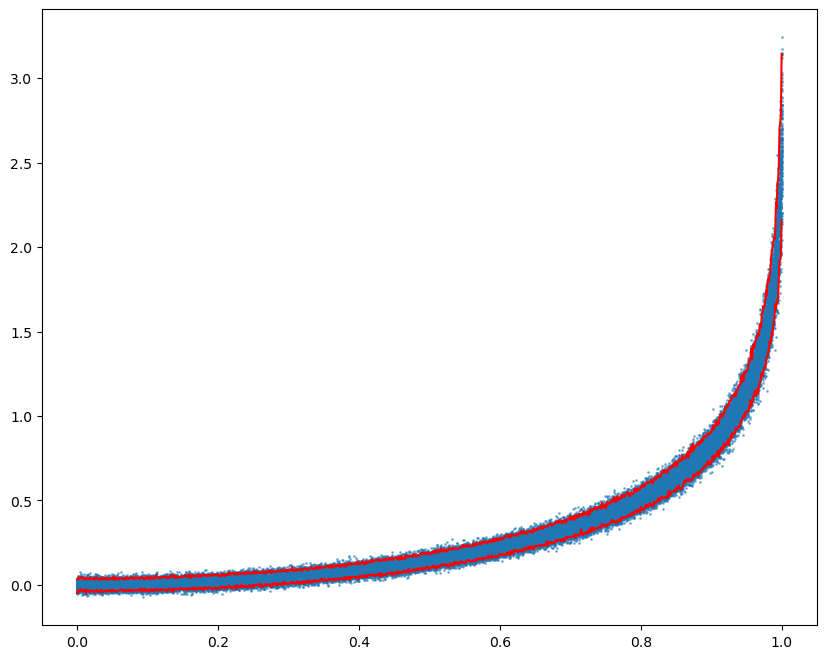

In [94]:
confi_interval = []
for i in range(AMI1s.shape[0]):
    tempdist = AMI1s[i, :]
    confidence = np.percentile(tempdist, [2.5, 97.5])
    confi_interval.append(confidence)

plt.figure(figsize=(10, 8))
for i in range(AC1s.shape[0]):
    plt.scatter(AC1s[i], np.mean(AMI1s[i, :]), s=1, alpha=0.5)
plt.scatter(np.repeat(AC1s, samplesize), AMI1s.flatten(), s=1, alpha= 0.5)
plt.plot(AC1s, np.array(confi_interval)[:, 0], color = 'r')
plt.plot(AC1s, np.array(confi_interval)[:, 1], color = 'r')

  0%|          | 0/1000 [00:00<?, ?it/s]

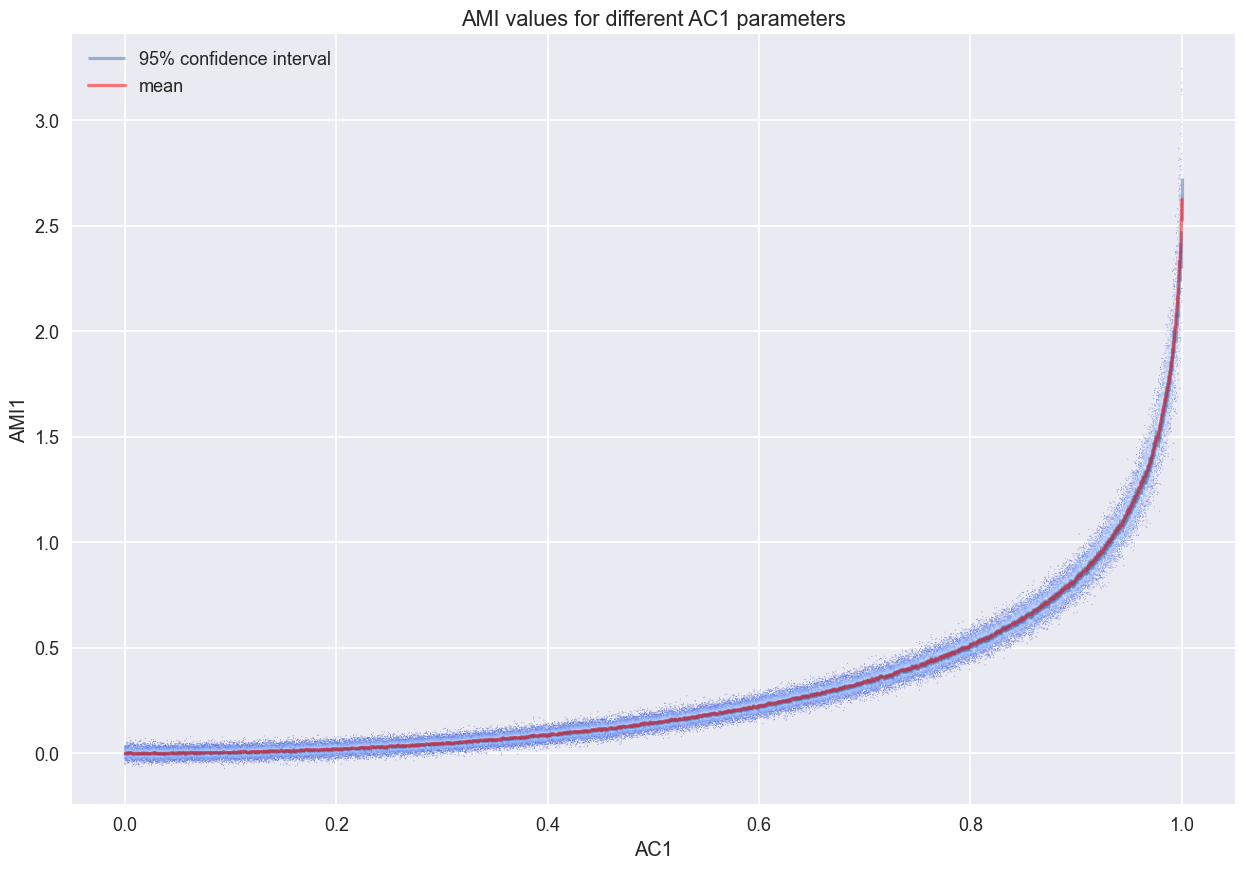

In [190]:
cmap = plt.cm.get_cmap("coolwarm")
num_of_AC1 = np.size(AC1s)
meanofAMI1 = np.mean(AMI1s, axis=1)
plt.figure(figsize=(15, 10))
ci95 = np.array([])
for i in trange(num_of_AC1):
    samples = AMI1s[i, :]
    
    mean = np.mean(samples)
    std = np.std(samples)
    normalized_samples = (samples - mean) / std

    pdf_values = norm.pdf(normalized_samples)

    colors = cmap(pdf_values)
    
    plt.scatter([AC1s[i]] * samplesize, samples, c=colors, s=0.1, alpha=0.5)
    ci = stats.norm.interval(0.9999, loc=mean, scale=sem(samples))
    ci95 = np.append(ci95, ci)


plt.vlines(AC1s, ci95[::2], ci95[1::2], alpha=0.5, label='95% confidence interval')
plt.plot(AC1s, meanofAMI1, alpha=0.5, label='mean', color='red')
plt.xlabel('AC1')
plt.ylabel('AMI1')
plt.title('AMI values for different AC1 parameters')
plt.legend()
plt.show()

In [201]:
import matplotlib as mpl
# mpl.rcParams['pdf.fonttype'] = 42
# mpl.rcParams['ps.fonttype'] = 42
# mpl.use('svg')
new_rc_params = {
    "font.family": 'Times', #probably python doesn't know Times, but it will replace it with a different font anyway. The final decision is up to the latex document anyway
    "font.size": 12, #choosing the font size helps latex to place all the labels, ticks etc. in the right place
    "font.serif": [],
    "svg.fonttype": 'none'} #to store text as text, not as path
mpl.rcParams.update(new_rc_params)

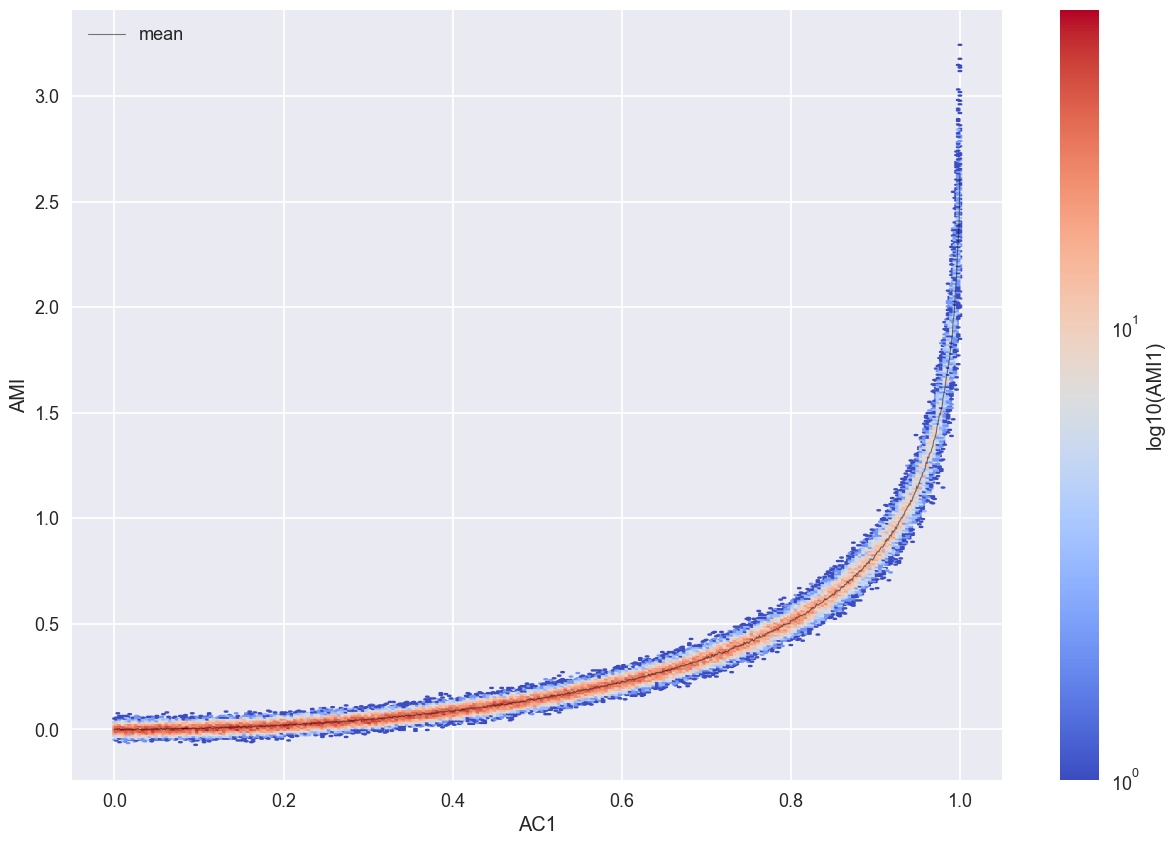

In [205]:
x = np.repeat(AC1s, samplesize)
y = AMI1s.flatten()
plt.style.use('seaborn')
plt.style.use('seaborn-talk')

upper = []
lower = []
# for samples in AMI1s:
#     ci = stats.norm.interval(alpha=0.99999999999, loc=np.mean(samples), scale=sem(samples))
#     upper.append(ci[1])
#     lower.append(ci[0])




plt.figure(figsize=(15, 10))

# 使用 hexbin 函数绘制热力图
cmap = plt.cm.get_cmap("coolwarm")
hb = plt.hexbin(x, y, gridsize=(250,400), cmap=cmap, bins='log')
num_of_AC1 = np.size(AC1s)
meanofAMI1 = np.mean(AMI1s, axis=1)
plt.plot(AC1s, meanofAMI1, alpha=0.5, label='mean', color='black', linewidth=0.8)
# plt.plot(AC1s, upper, alpha=0.5, label='upper', color='red', linewidth=0.8)
# plt.plot(AC1s, lower, alpha=0.5, label='lower', color='green',linewidth=0.8)

cb = plt.colorbar(hb)
cb.set_label('log10(AMI1)')

plt.legend(loc='upper left')
plt.xlabel('AC1')
plt.ylabel('AMI')
plt.savefig('samplesdistribution.svg', format='svg', dpi=1200)
plt.savefig('samplesdistribution.png', format='png', dpi=1200)

plt.show()

In [158]:
# plt.plot(AC1s, meanofAMI1, alpha=0.5, label='mean', color='black', linewidth=0.8)
# plt.plot(AC1s, upper, alpha=0.5, label='95% confidence interval', color='red', linewidth=0.8)
# plt.plot(AC1s, lower, alpha=0.5, color='red', linewidth=0.8)

In [169]:
varianceofAMI1 = np.var(AMI1s, axis=1)

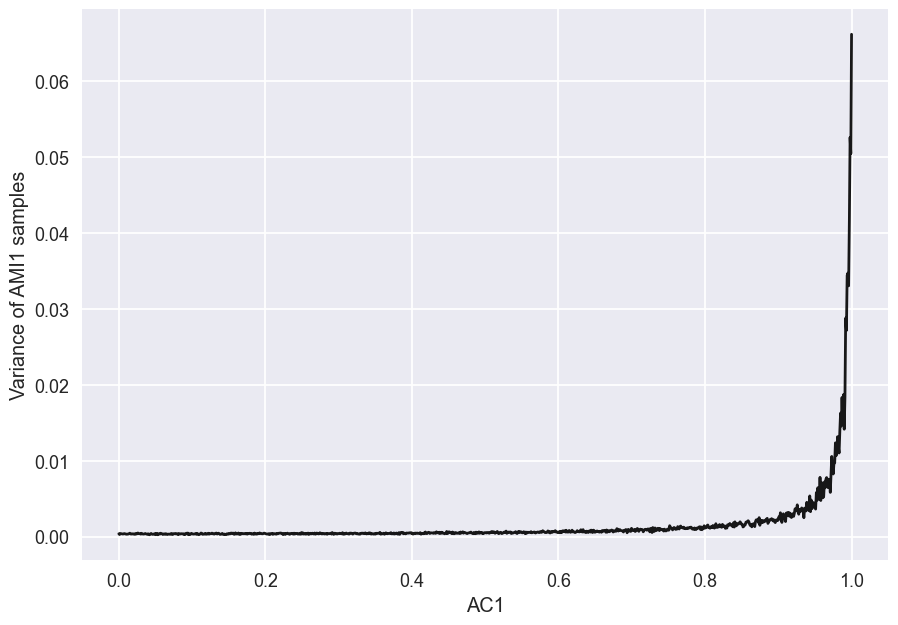

In [204]:
plt.figure()
plt.plot(AC1s, varianceofAMI1, alpha=0.9, label='variance', color='black', linewidth=2)
plt.xlabel('AC1')
plt.ylabel('Variance of AMI1 samples')
plt.savefig('varianceofAMI1.svg', format='svg', dpi=1200)

C:\Users\BK\AppData\Local\Temp\ipykernel_22404\3280012758.py:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot (AC1s, 1/(1-AC1s**2), color = 'r')


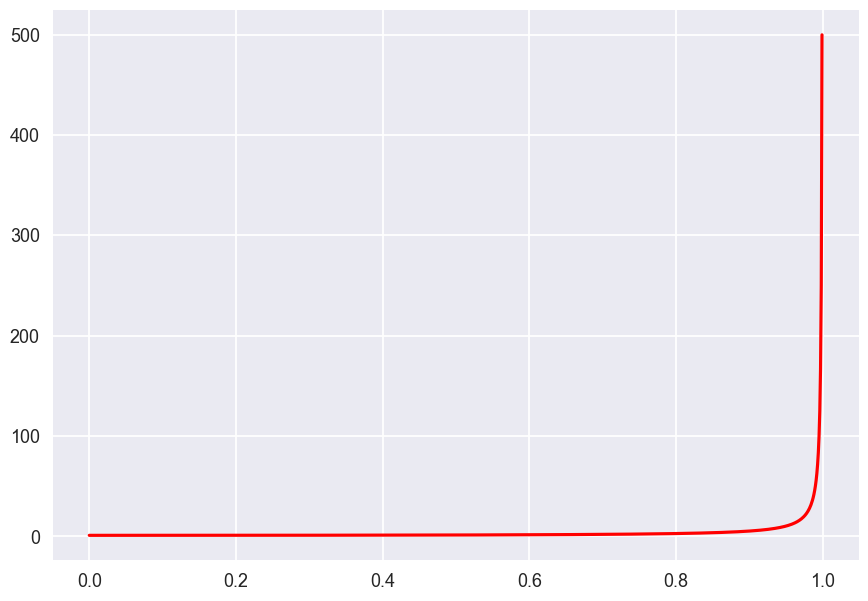

In [172]:
plt.plot (AC1s, 1/(1-AC1s**2), color = 'r')

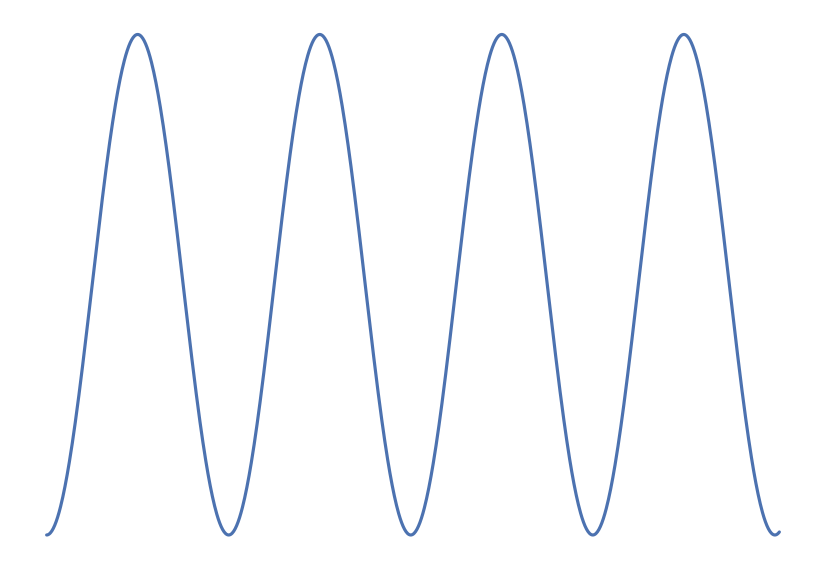

In [217]:
plt.plot(np.sin(np.linspace(3*np.pi/2, 30,1000)))

plt.axis('off')
plt.savefig('sin.svg', format='svg', dpi=1200)